### 08_load_classical_model
model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')  
top3_indexs = np.argsort(preds)[0, ::-1][:3]   
conda install tensorflow-hub  
hub.KerasLayer(module_url, input_shape=(299, 299, 3), output_shape=(1001, ), name='Inception_v3') 

In [1]:
import tensorflow as tf

model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

__________________________________________________________________________________________________
activation_51 (Activation)      (None, 17, 17, 160)  0           batch_normalization_51[0][0]     
__________________________________________________________________________________________________
activation_56 (Activation)      (None, 17, 17, 160)  0           batch_normalization_56[0][0]     
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 17, 17, 160)  179200      activation_51[0][0]              
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 17, 17, 160)  179200      activation_56[0][0]              
__________________________________________________________________________________________________
batch_normalization_52 (BatchNo (None, 17, 17, 160)  480         conv2d_52[0][0]                  
__________

將網路模型儲存到TensorBoard上：  
Import資料預處理和輸出解碼的函式：

Predicted: [('n02504458', 'African_elephant', 0.8037862), ('n01871265', 'tusker', 0.12163912), ('n02504013', 'Indian_elephant', 0.004299273)]


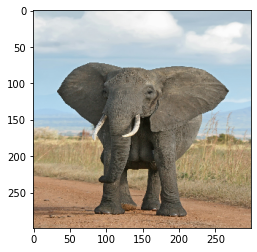

In [5]:
model_tb = tf.keras.callbacks.TensorBoard(log_dir='lab8-logs-inceptionv3-keras')
model_tb.set_model(model)

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
import matplotlib.pyplot as plt

def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  # 讀取檔案
    img_decode = tf.image.decode_image(img_string)  # 將檔案以影像格式來解碼
    img_decode = tf.image.resize(img_decode, resize)  # 將影像resize到網路輸入大小
    # 將影像格式增加到4維(batch, height, width, channels)，模型預測要求格式
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode

img_path = 'imgs/elephant.jpg'
img = read_img(img_path)  # 透過剛創建的函式讀取影像
plt.imshow(tf.cast(img, tf.uint8)[0])  # 透過matplotlib顯示圖片需將影像轉為Integers

img = preprocess_input(img)  # 影像前處理
preds = model.predict(img)  # 預測圖片
print("Predicted:", decode_predictions(preds, top=3)[0])  # 輸出預測最高的三個類別

In [7]:
import tensorflow_hub as hub
import numpy as np
# Inception V3預訓練模型的URL
module_url = "https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"

# 創建一個Sequential Model，網路模型裡面包含了Inception V3網路層
model = tf.keras.Sequential([
    # hub.KerasLayer將載入的Inception V3模型封裝成網路層(Keras Layer)
    hub.KerasLayer(module_url, 
                  input_shape=(299, 299, 3),  # 模型輸入大小
                   output_shape=(1001, ),   # 模型輸出大小
                   name='Inception_v3')  # 網路層名稱
])

model.summary()

def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  # 讀取檔案
    img_decode = tf.image.decode_image(img_string)  # 將檔案以影像格式來解碼
    img_decode = tf.image.resize(img_decode, resize)  # 將影像resize到網路輸入大小
    img_decode = img_decode / 255.0  # 對影像做正規畫，將數值縮放到0~1之間
    # 將影像格式增加到4維(batch, height, width, channels)，模型預測要求格式
    img_decode = tf.expand_dims(img_decode, axis=0)  # 
    return img_decode

# 下載ImageNet 的標籤檔
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt',\
            'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# 讀取標籤檔中的數據
with open(labels_path) as file:
    lines = file.read().splitlines()
#print(lines)  # 顯示讀取的標籤

imagenet_labels = np.array(lines)  # 將標籤轉成numpy array做為網路輸出的解碼器

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inception_v3 (KerasLayer)    (None, 1001)              23853833  
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


Predicted: African elephant


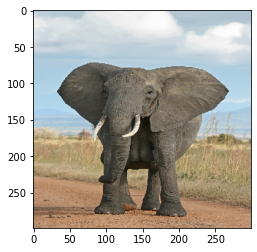

In [9]:
img_path = 'imgs/elephant.jpg'
img = read_img(img_path)  # 透過剛創建的函式讀取影像
plt.imshow(img[0])

preds = model.predict(img)  # 預測圖片
index = np.argmax(preds)  # 取得預測結果最大的Index
print("Predicted:", imagenet_labels[index])  # 透過解碼器將輸出轉成標籤

In [10]:
top3_indexs = np.argsort(preds)[0, ::-1][:3]  
print("Predicted:", imagenet_labels[top3_indexs])  # 透過解碼器將輸出轉成標籤

Predicted: ['African elephant' 'tusker' 'Indian elephant']
